**1. Import Package and Import Data**

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pylab import rcParams

# Configure visualisations
get_ipython().magic(u'matplotlib inline')
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6
from pylab import rcParams

# Data Science Models
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,GradientBoostingRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBRegressor

**2. Data Preparation**

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**From Info**
* we know that we can drop these columns as they are containing many Null value and No use column like ID
<pre>
    1.  Alley
    2.  FireplaceQu
    3.  PoolQC
    4.  Fence
    5.  MiscFeature
    6.  ID
</pre>

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.select_dtypes('object').nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [6]:
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### Correlation of data

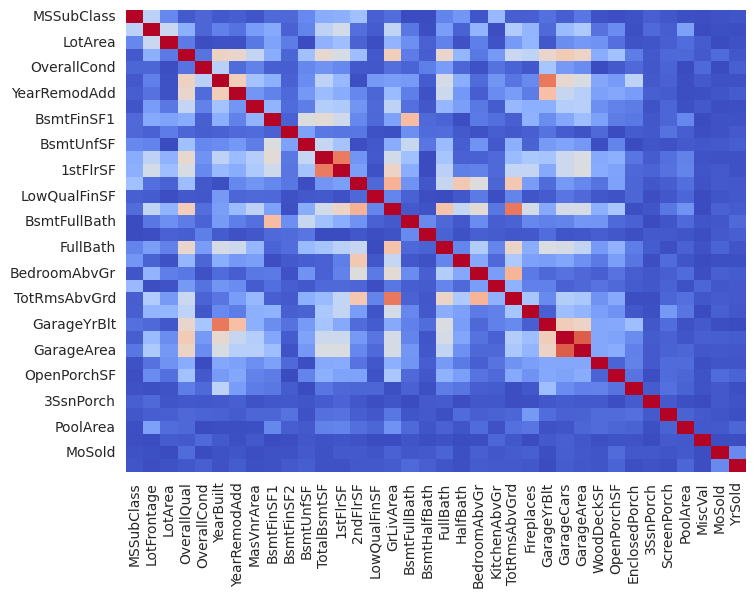

<Figure size 1400x1400 with 0 Axes>

In [7]:
df_corr = df.select_dtypes('number').drop(columns = ['Id', 'SalePrice']).corr().abs()
sns.heatmap(df_corr,cmap="coolwarm",annot=False,cbar=False)
plt.figure(figsize=(14, 14))
plt.show()

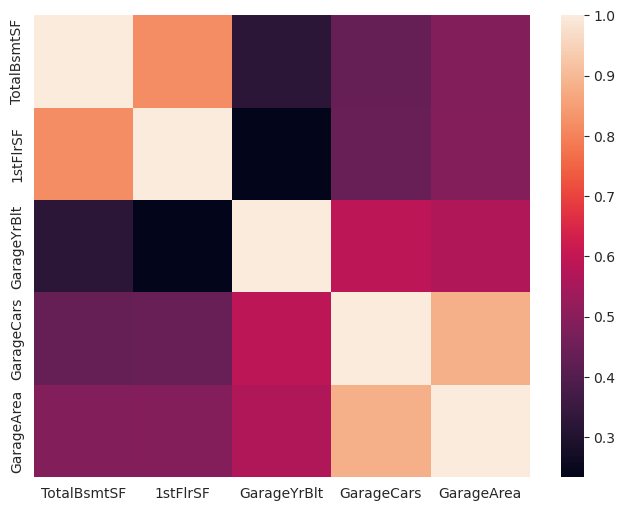

In [8]:
df_gar_corr = df[['TotalBsmtSF','1stFlrSF','GarageYrBlt','GarageCars','GarageArea']].corr()
sns.heatmap(df_gar_corr)
plt.show()

**As the heatmap show**
* It show that there are correlated data which would be able to drop
<pre>
    1.GarageCars
    2.1stFlrSF
</pre>

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


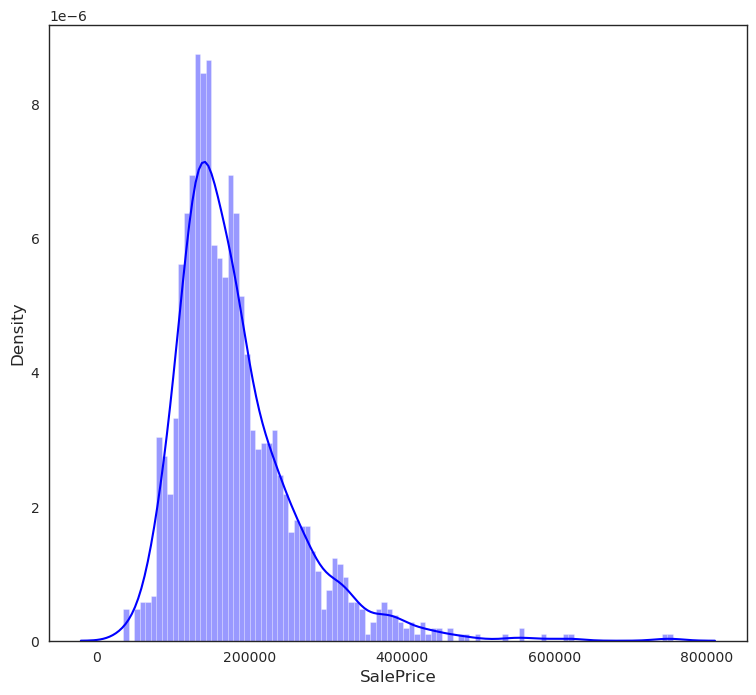

In [9]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

**3. Data Cleaning**

In [10]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Drop column contains NULL more than half
    df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],inplace=True)
    
    # Drop columns with multicollinearity
    df.drop(columns = ['GarageCars','1stFlrSF'],inplace=True)
    
    return df

In [11]:
df = wrangle('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


**4. Data Preprocessing**

In [12]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")


X_train: (1168, 72)
X_test: (292, 72)
y_train: (1168,)
y_test: (292,)


**Baseline Model**

In [14]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print("Mean apt price:", y_mean.round(2))
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
baseline_mse = mean_squared_error(y_train,y_pred_baseline)
print("Baseline MAE:", baseline_mae)
print("Baseline MSE:", baseline_mse)

Mean apt price: 181441.54
Baseline MAE: 56306.770899793584
Baseline MSE: 5964550379.770499


# **Create Pipeline**
In case of someone confuse why I used OneHotEncoder and Imputer
* **OneHotEncoder**: to encoder object in form of number
* **Imputer**: to deal with NULL value

In [15]:
model = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        XGBRegressor()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [16]:
model2 = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        Lasso(alpha=0.5)
)
model2.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()),
                ('lasso', Lasso(alpha=0.5))])

In [17]:
model3 = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        Ridge(alpha=1.0)
)
model3.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [18]:
model4 = make_pipeline(
        OneHotEncoder(),
        SimpleImputer(),
        GradientBoostingRegressor()
)
model4.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', 'KitchenQual', ...])),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Sqaured Error:", mse)

Mean Absolute Error: 17333.021163313355
Mean Sqaured Error: 740897233.5498209


In [20]:
# Predict on the test set model2
y_pred2 = model2.predict(X_test)

# Evaluate the model using mean squared error
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Absolute Error:", mae2)
print("Mean Sqaured Error:", mse2)

Mean Absolute Error: 18114.93921860959
Mean Sqaured Error: 798134246.2534161


In [21]:
# Predict on the test set
y_pred3 = model3.predict(X_test)

# Evaluate the model using mean squared error
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
print("Mean Absolute Error:", mae3)
print("Mean Sqaured Error:", mse3)

Mean Absolute Error: 18754.850828766874
Mean Sqaured Error: 858231276.1467894


In [22]:
# Predict on the test set
y_pred4 = model4.predict(X_test)

# Evaluate the model using mean squared error
mae4 = mean_absolute_error(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)
print("Mean Absolute Error:", mae4)
print("Mean Sqaured Error:", mse4)

Mean Absolute Error: 17502.089286830575
Mean Sqaured Error: 792840049.0689956


### A matrix comparing the Mean Absolute Error (MAE) and Mean Squared Error (MSE) of your model and the baseline model

In [23]:

# Assuming 'variable1' and 'variable2' are the two variables you want to compare
data = {
    'Model': ['Baseline', 'Your Model'],
    'MAE': [baseline_mae, mae],
    'MSE': [baseline_mse, mse]
}

comparison_df = pd.DataFrame(data)

print(comparison_df)

        Model           MAE           MSE
0    Baseline  56306.770900  5.964550e+09
1  Your Model  17333.021163  7.408972e+08


### Prediction

In [24]:
X_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
X_test = X_test[X.columns]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    127680.007812
1    162007.734375
2    169199.609375
3    192382.343750
4    190178.671875
dtype: float32

# Submission

In [25]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = model.predict(X_test)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,127680.007812
1,1462,162007.734375
2,1463,169199.609375
3,1464,192382.343750
4,1465,190178.671875
